# Strojno učenje: Evelvacija in izboljšanje modela

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# create a synthetic dataset
X, y = make_blobs(random_state=0)

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)

# evaluate the model on the test set
print(f"Test set score: {logreg.score(X_test, y_test):.2f}")

Test set score: 0.88


## Cross-Validation

### Cross-Validation in scikit-learn

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [5]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [6]:
scores = cross_val_score(logreg, iris.data, iris.target)

In [7]:
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [8]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)

In [9]:
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [10]:
print(f"Average cross-validation score: {scores.mean():.2f}")

Average cross-validation score: 0.97


### Benefits of Cross-Validation

### Stratified k-Fold Cross-Validation

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
print(f"Iris labels:\n{iris.target}")

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


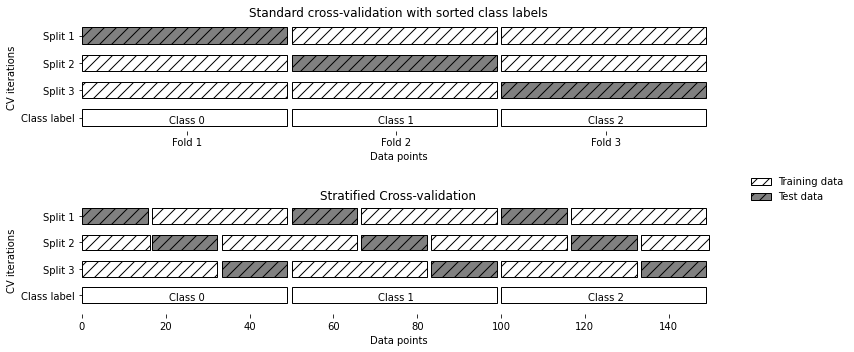

In [12]:
from plot_helpers import plot_stratified_cross_validation
plot_stratified_cross_validation()

### More control over cross-validation

In [13]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [14]:
print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [15]:
kfold = KFold(n_splits=3)
print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross-validation scores:
[0. 0. 0.]


In [16]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross-validation scores:
[0.98 0.96 0.96]


### Leave-one-out cross-validation

In [17]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print("Number of cv iterations: ", len(scores))
print(f"Mean accuracy: {scores.mean():.2f}")

Number of cv iterations:  150
Mean accuracy: 0.97


### Shuffle-split cross-validation

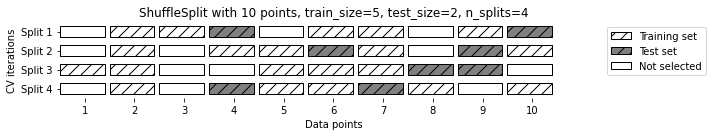

In [18]:
from plot_helpers import plot_shuffle_split
plot_shuffle_split()

In [19]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)

scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

print(f"Cross-validation scores:\n{scores}")

Cross-validation scores:
[0.97333333 0.93333333 0.97333333 0.96       0.94666667 0.96
 1.         0.96       1.         0.97333333]


### Cross-validation with groups

In [21]:
from sklearn.model_selection import GroupKFold

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)

# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))

print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


## Grid Search

### Simple Grid Search

In [22]:
#naive grid search implementation
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print(f"Size of training set: {X_train.shape[0]} size of test set: {X_test.shape[0]}")
      
best_score = 0
      
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### The Danger of Overfitting the Parameters and the Validation Set

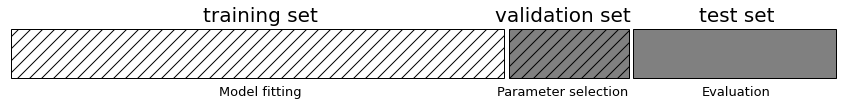

In [23]:
from plot_helpers import plot_threefold_split
plot_threefold_split()

In [24]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)


print(f"Size of training set: {X_train.shape[0]} size of validation set: {X_valid.shape[0]} size of test set: {X_test.shape[0]}\n")

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print(f"Best score on validation set: {best_score:.2f}")
print(f"Best parameters: {best_parameters}")
print(f"Test set score with best parameters: {test_score:.2f}")

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### Grid Search with Cross-Validation

In [25]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
        
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

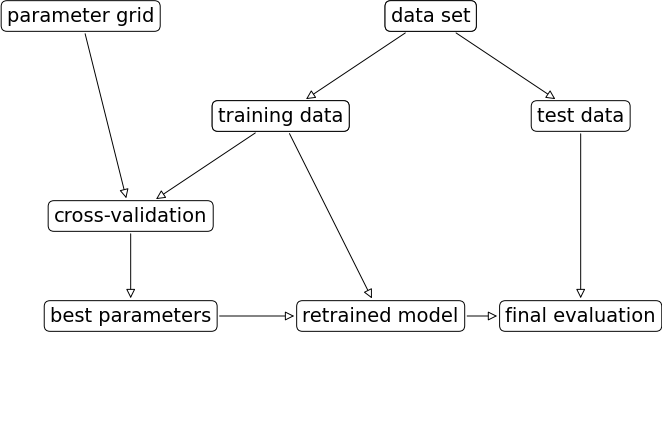

In [26]:
from plot_helpers import plot_grid_search_overview
plot_grid_search_overview()

In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

print(f"Parameter grid:\n{param_grid}")

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [31]:
print(f"Test set score: {grid_search.score(X_test, y_test):.2f}")

Test set score: 0.97


In [32]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [33]:
print(f"Best estimator:\n{grid_search.best_estimator_}")

Best estimator:
SVC(C=10, gamma=0.1)


#### Analyzing the result of cross-validation

In [34]:
import pandas as pd

# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003177,0.002038,0.001411,0.000766,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001364,0.000203,0.001338,0.001323,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001298,0.000271,0.000581,0.000049,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.001559,0.000392,0.000727,0.000108,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001395,0.000357,0.000681,0.000259,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


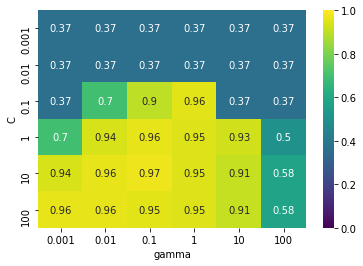

In [35]:
# from plot_helpers import heatmap

# scores = np.array(results['mean_test_score']).reshape(6, 6)

# # plot the mean cross-validation scores
# heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
# plt.show()


import seaborn as sns
scores = np.array(results['mean_test_score']).reshape(6, 6)
sns.heatmap(scores, vmin=0, vmax=1, cmap="viridis", annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel("gamma") 
plt.ylabel("C") 
plt.show()

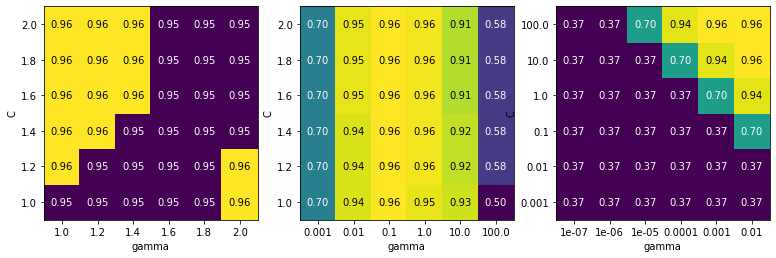

In [36]:
from plot_helpers import heatmap

fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
    param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # plot the mean cross-validation scores
    scores_image = heatmap(scores, 
                           xlabel='gamma', 
                           ylabel='C', 
                           xticklabels=param_grid['gamma'], 
                           yticklabels=param_grid['C'], 
                           cmap="viridis", ax=ax)

#### Search over spaces that are not grids

In [37]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

print(f"List of grids:\n{param_grid}")

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [38]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


### Parallelizing cross-validation and grid search

## Evaluation Metrics and Scoring

### Metrics for Binary Classification

#### Kinds of errors

#### Imbalanced datasets

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [2]:
from sklearn.dummy import DummyClassifier
import numpy as np

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print(f"Unique predicted labels: {np.unique(pred_most_frequent)}")
print(f"Test score: {dummy_majority.score(X_test, y_test):.2f}")

Unique predicted labels: [False]
Test score: 0.90


In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

pred_tree = tree.predict(X_test)
print(f"Test score: {tree.score(X_test, y_test):.2f}")

Test score: 0.92


In [4]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(f"dummy score: {dummy.score(X_test, y_test):.2f}")

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f"logreg score: {logreg.score(X_test, y_test):.2f}")

dummy score: 0.81
logreg score: 0.98


#### Confusion matrices

In [5]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(f"Confusion matrix:\n{confusion}")

Confusion matrix:
[[402   1]
 [  6  41]]


<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg">

In [6]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))

print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))

print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))

print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[372  31]
 [ 46   1]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


**Precision**

`Precision measures how many of the samples predicted as positive are actually positive:`

$Precision = TP/(TP+FP)$

**Recall**

`Recall, on the other hand, measures how many of the positive samples are captured by the positive predictions`

$Recall = TP/(TP+FN)$

**f-score**

$F = (2 · precision·recall)/(precision+recall)$

In [7]:
from sklearn.metrics import f1_score

print(f"f1 score most frequent: {f1_score(y_test, pred_most_frequent):.2f}")

print(f"f1 score dummy: {f1_score(y_test, pred_dummy):.2f}")
print(f"f1 score tree: {f1_score(y_test, pred_tree):.2f}")
print(f"f1 score logistic regression: {f1_score(y_test, pred_logreg):.2f}")

f1 score most frequent: 0.00
f1 score dummy: 0.03
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.89      0.92      0.91       403
        nine       0.03      0.02      0.03        47

    accuracy                           0.83       450
   macro avg       0.46      0.47      0.47       450
weighted avg       0.80      0.83      0.81       450



In [10]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



### Metrics for Multiclass Classification

In [13]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

lr = LogisticRegression(max_iter=3000).fit(X_train, y_train)
pred = lr.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


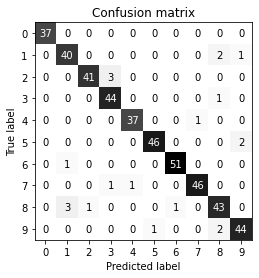

In [14]:
from plot_helpers import heatmap
import matplotlib.pyplot as plt

scores_image = heatmap(confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels=digits.target_names,
yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()
plt.show()

In [15]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [16]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


### Regression Metrics